In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
car_filepath = '/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv'
car_data = pd.read_csv(car_filepath)
print('data uploaded')
print(car_data.shape)
print(car_data.head())

In [ ]:
car_data.info()

In [ ]:
car_data['model'].unique()



In [ ]:

car_data['fuelType'].unique()
car_data['fuelType'].replace('Petrol',0,inplace=True)
car_data['fuelType'].replace('Diesel',1,inplace=True)
car_data['fuelType'].replace('Hybrid',2,inplace=True)
car_data['fuelType'].replace('Other',3,inplace=True)

In [ ]:
car_data['transmission'].unique()
car_data['transmission'].replace('Manual',0,inplace=True)
car_data['transmission'].replace('Automatic',1,inplace=True)
car_data['transmission'].replace('Semi-Auto',2,inplace=True)
car_data['transmission'].replace('Other',3,inplace=True)

In [ ]:
car_data['transmission'] = car_data['transmission'].astype(int)

In [ ]:
car_data.describe()

**Cleaning the Data**: 
The K-Nearest Neighbors Algorithm uses the distance formula to determine the nearest neighbors. This means we can only use numerical columns from the data and implement it in our model.

In [ ]:
continuous_numeric = [ 'year', 'mileage','tax','transmission','fuelType','mpg','engineSize','price']

numeric_cars = car_data[continuous_numeric].copy()
numeric_cars.head()

Checking Null Values

In [ ]:
numeric_cars.isnull().sum()

No null values noted

In [ ]:
numeric_cars.dtypes

The k-nearest neighbors algorithm uses the euclidean distance to determine the closest neighbor.

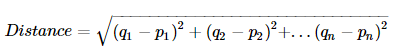

Where q and p represent two rows and the subscript representing a column. However, each column have different scaling. For example, if we take row 2, and row 3. The price has a difference of 1650, while the difference in mileage is 21,609. The algorithm will give extra weight towards the difference in Mileage.

That is why it is important to normalize the dataset into a unit vector. After normalization we'll have values from -1 to 1.

Statistically, normalization is given as
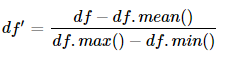

where df is any dataframe

In [ ]:
normalized_cars = (numeric_cars - numeric_cars.mean())/(numeric_cars.max()-numeric_cars.min())
normalized_cars['price'] = numeric_cars['price']
normalized_cars.head()

We are going to write a function that uses the KNeighborsRegressor class from scikit-learn. The class here actually generates a model that fits the training dataset. It is a regression method using k-nearest neighbors.

In [ ]:
def knn_train_test_uni(feature, target_column, df, k):
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    

    # Split the dataset
    train_set = rand_df.iloc[0:int(len(rand_df)/2)]
    test_set = rand_df.iloc[int(len(rand_df)/2):]
    
    # Train
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[[feature]], train_set[target_column])

    
    # Predict
    predictions = knn.predict(test_set[[feature]])
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_set[target_column], predictions))

    
    return rmse



In [ ]:
from sklearn import metrics
feature = normalized_cars.columns.drop('price')
k_values = [1, 3, 5, 7, 9, 15]
K_v = 2
rmse_uni = {}
current_rmse = []
target_column = 'price'

for feature in continuous_numeric[0:-1]:
    for k in k_values:
        current_rmse.append(knn_train_test_uni(feature, target_column, normalized_cars, k))
        
    rmse_uni[feature] = current_rmse
    current_rmse = []                  
rmse_uni



In [ ]:
fig, ax = plt.subplots(1)

for key, values in rmse_uni.items():
    ax.plot(k_values, values, label=key)
    ax.set_xlabel('k value')
    ax.set_ylabel('RMSE')
    ax.set_title('RMSE for Each Parameter\nvs. k value')
    ax.tick_params(top="off", left="off", right="off", bottom='off')
    ax.legend(bbox_to_anchor=(1.5, 1), prop={'size': 11})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

Here the rmse ranges from 4000 to 12000 dollars

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics

y= normalized_cars.price
X= normalized_cars.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

#to store rmse values for different k
rmse_val2 = [] 
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    #fit the model
    model.fit(X_train, y_train)  
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

   
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))


In [ ]:
#plotting the rmse values against k values
import matplotlib.pyplot as plt
plt.plot(rmse_val2)
plt.ylabel('RMSE')
plt.xlabel('K values')
plt.show()